Observe whether there is a positive or negative correlation between the two variables, identify periods of similar trends, or assess how changes in one variable might affect the other.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Read the data from CSV file


In [76]:
data = pd.read_csv('CPIAUCSL.csv')

In [77]:
data.head(5)

,DATE,CPIAUCSL
0,1/1/1947,21.48
1,2/1/1947,21.62
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95


Convert the data column to datetime format and set the date as the index.


In [78]:
data['DATE'] = pd.to_datetime(data['DATE'])


data.set_index('DATE', inplace=True)

Read the housing data from CSV file and convet the date column to datetime format. Set the date as the index.

In [79]:
housing_data = pd.read_csv('CSUSHPISA.csv')

housing_data['DATE'] = pd.to_datetime(housing_data['DATE'])

housing_data.set_index('DATE', inplace=True)

In [80]:
housing_data.head(5)

,CSUSHPISA
DATE,
1987-01-01,63.964
1987-02-01,64.424
1987-03-01,64.735
1987-04-01,65.131
1987-05-01,65.564


Merge the two datasets

In [81]:
merge_data = pd.merge(data, housing_data, left_index=True, right_index=True)

In [82]:
summary = merge_data.describe()

correlations = merge_data.corr()

scaler = MinMaxScaler()
merged_data_normalized = pd.DataFrame(scaler.fit_transform(merge_data), columns=merge_data.columns, index=merge_data.index)

Visualize the data with two different y-axes

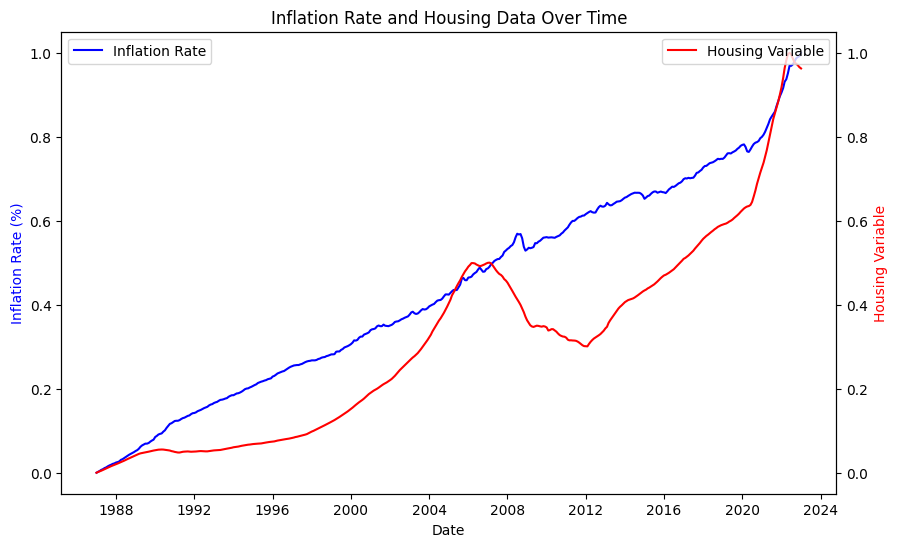

In [83]:
# Line plot of housing data and inflation rate over time with different y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(merged_data_normalized.index, merged_data_normalized['CPIAUCSL'], label='Inflation Rate', color='blue')
ax2.plot(merged_data_normalized.index, merged_data_normalized['CSUSHPISA'], label='Housing Variable', color='red')

ax1.set_title('Inflation Rate and Housing Data Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Inflation Rate (%)', color='blue')
ax2.set_ylabel('Housing Variable', color='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


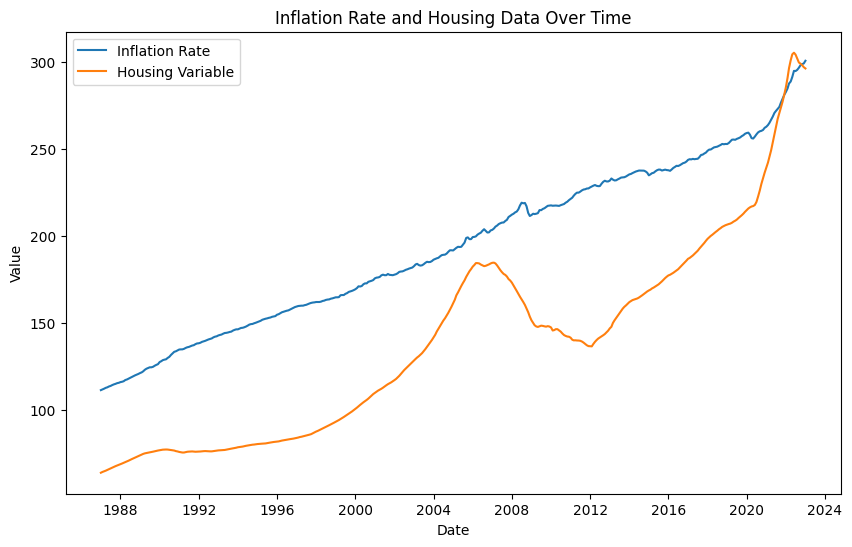

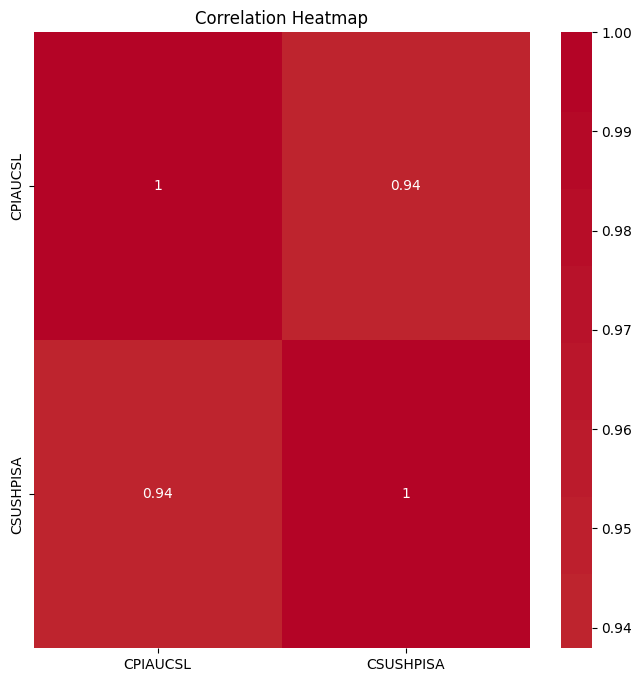

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(merge_data.index, merge_data['CPIAUCSL'], label='Inflation Rate')
plt.plot(merge_data.index, merge_data['CSUSHPISA'],label='Housing Variable')
plt.title('Inflation Rate and Housing Data Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(8, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()